In [1]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")
from src.nce.binary import NceBinaryCrit
from src.nce.cnce import CondNceCrit

from src.noise_distr.normal import MultivariateNormal
from src.noise_distr.conditional_normal import ConditionalMultivariateNormal

from src.models.ring_model.ring_model import RingModel, RingModelNCE
from src.data.ring_model_dataset import RingModelDataset

from src.training.model_training import train_model
from src.training.training_utils import PrecisionErrorMetric

In [36]:
# Data specs
num_dims = 5
mu = 3
precision = 2

# Experiments specs
num_samples = [20, 50, 100, 200]
num_neg_samples = [2, 5, 10]
reps = 5

# Criteria and noise distr. specs
criteria = [NceBinaryCrit, CondNceCrit]
crit_labels = ["binary", "conditional"]
mu_noise = 0
sigma_noise = 1

# Training specs
error_metric = PrecisionErrorMetric(true_precision=precision).metric
batch_size = 32
num_epochs = 100

In [37]:
# Run experiments

error_res = np.zeros((len(num_samples), len(num_neg_samples), len(criteria), reps))

# Sorry för alla loopar
for i, N in enumerate(num_samples):
    
    for j, J in enumerate(num_neg_samples):
        
        for rep in range(reps):
                        
            training_data = RingModelDataset(sample_size=N, num_dims=num_dims, mu=mu, precision=precision, 
                                             root_dir="res/datasets/ring_data_size_" + str(N) + "_nn_" + str(J) + "_rep_" + str(rep))
            train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)

            log_precision_init = np.random.normal()
            
            for k, (crit, lab) in enumerate(zip(criteria, crit_labels)):
            
                if isinstance(crit, NceBinaryCrit):
                    log_part_fun_init = np.random.normal()
                    p_m = RingModelNCE(mu=mu, log_precision=log_precision_init, log_part_fun=log_part_fun_init)
                else:
                    p_m = RingModel(mu=mu, log_precision=log_precision_init)
                    
                if isinstance(crit, CondNceCrit):
                    p_n = ConditionalMultivariateNormal(mu=0, sigma_sq=sigma_noise, dim=num_dims)
                else:
                    p_n = MultivariateNormal(mu=mu_noise, sigma_sq=sigma_noise, dim=num_dims)
                    
                criterion = crit(p_m, p_n)
                
                save_dir = "res/param_error_" + lab + "_samples_" + str(N) + "_num_neg_" + str(J) + "_rep_" + str(rep)
                error_res[i, j, k, rep] = train_model(criterion, error_metric, train_loader, save_dir, neg_sample_size=J, num_epochs=num_epochs)

np.save("res/final_param_error_ring_model_all", error_res)

[1] loss: 1.314
[1] evaluation metric: 2.381
[2] loss: 1.468
[2] evaluation metric: 2.433
[3] loss: 1.592
[3] evaluation metric: 2.489
[4] loss: 1.544
[4] evaluation metric: 2.541
[5] loss: 1.588
[5] evaluation metric: 2.595
[6] loss: 1.702
[6] evaluation metric: 2.643
[7] loss: 1.092
[7] evaluation metric: 2.678
[8] loss: 1.448
[8] evaluation metric: 2.718
[9] loss: 1.402
[9] evaluation metric: 2.755
[10] loss: 1.519
[10] evaluation metric: 2.794
[11] loss: 1.314
[11] evaluation metric: 2.828
[12] loss: 1.227
[12] evaluation metric: 2.853
[13] loss: 1.226
[13] evaluation metric: 2.884
[14] loss: 1.297
[14] evaluation metric: 2.911
[15] loss: 1.268
[15] evaluation metric: 2.935
[16] loss: 0.999
[16] evaluation metric: 2.958
[17] loss: 1.474
[17] evaluation metric: 2.987
[18] loss: 1.386
[18] evaluation metric: 3.011
[19] loss: 0.750
[19] evaluation metric: 3.027
[20] loss: 1.235
[20] evaluation metric: 3.047
[21] loss: 1.285
[21] evaluation metric: 3.069
[22] loss: 1.285
[22] evaluatio

[80] loss: 1.377
[80] evaluation metric: 3.652
[81] loss: 1.159
[81] evaluation metric: 3.655
[82] loss: 1.283
[82] evaluation metric: 3.659
[83] loss: 1.190
[83] evaluation metric: 3.661
[84] loss: 1.155
[84] evaluation metric: 3.664
[85] loss: 1.181
[85] evaluation metric: 3.667
[86] loss: 0.937
[86] evaluation metric: 3.669
[87] loss: 1.242
[87] evaluation metric: 3.673
[88] loss: 1.087
[88] evaluation metric: 3.675
[89] loss: 1.400
[89] evaluation metric: 3.678
[90] loss: 1.228
[90] evaluation metric: 3.680
[91] loss: 0.983
[91] evaluation metric: 3.683
[92] loss: 1.110
[92] evaluation metric: 3.685
[93] loss: 1.174
[93] evaluation metric: 3.687
[94] loss: 1.311
[94] evaluation metric: 3.690
[95] loss: 1.075
[95] evaluation metric: 3.693
[96] loss: 1.264
[96] evaluation metric: 3.695
[97] loss: 1.117
[97] evaluation metric: 3.697
[98] loss: 1.135
[98] evaluation metric: 3.700
[99] loss: 1.461
[99] evaluation metric: 3.702
[100] loss: 1.183
[100] evaluation metric: 3.704
Finished tr

[18] loss: 0.638
[18] evaluation metric: 2.079
[19] loss: 0.618
[19] evaluation metric: 2.071
[20] loss: 0.629
[20] evaluation metric: 2.065
[21] loss: 0.663
[21] evaluation metric: 2.063
[22] loss: 0.635
[22] evaluation metric: 2.058
[23] loss: 0.635
[23] evaluation metric: 2.052
[24] loss: 0.676
[24] evaluation metric: 2.052
[25] loss: 0.645
[25] evaluation metric: 2.048
[26] loss: 0.650
[26] evaluation metric: 2.044
[27] loss: 0.647
[27] evaluation metric: 2.040
[28] loss: 0.633
[28] evaluation metric: 2.035
[29] loss: 0.656
[29] evaluation metric: 2.031
[30] loss: 0.631
[30] evaluation metric: 2.024
[31] loss: 0.632
[31] evaluation metric: 2.018
[32] loss: 0.670
[32] evaluation metric: 2.017
[33] loss: 0.632
[33] evaluation metric: 2.011
[34] loss: 0.626
[34] evaluation metric: 2.005
[35] loss: 0.655
[35] evaluation metric: 2.001
[36] loss: 0.631
[36] evaluation metric: 1.996
[37] loss: 0.652
[37] evaluation metric: 1.994
[38] loss: 0.655
[38] evaluation metric: 1.991
[39] loss: 0.

[74] loss: 0.615
[74] evaluation metric: 1.310
[75] loss: 0.624
[75] evaluation metric: 1.303
[76] loss: 0.593
[76] evaluation metric: 1.291
[77] loss: 0.640
[77] evaluation metric: 1.292
[78] loss: 0.604
[78] evaluation metric: 1.281
[79] loss: 0.610
[79] evaluation metric: 1.274
[80] loss: 0.562
[80] evaluation metric: 1.262
[81] loss: 0.624
[81] evaluation metric: 1.256
[82] loss: 0.647
[82] evaluation metric: 1.257
[83] loss: 0.620
[83] evaluation metric: 1.253
[84] loss: 0.626
[84] evaluation metric: 1.248
[85] loss: 0.624
[85] evaluation metric: 1.243
[86] loss: 0.592
[86] evaluation metric: 1.234
[87] loss: 0.630
[87] evaluation metric: 1.230
[88] loss: 0.635
[88] evaluation metric: 1.226
[89] loss: 0.633
[89] evaluation metric: 1.222
[90] loss: 0.615
[90] evaluation metric: 1.216
[91] loss: 0.581
[91] evaluation metric: 1.205
[92] loss: 0.645
[92] evaluation metric: 1.205
[93] loss: 0.564
[93] evaluation metric: 1.192
[94] loss: 0.575
[94] evaluation metric: 1.178
[95] loss: 0.

[27] loss: 2.801
[27] evaluation metric: 2.492
[28] loss: 2.851
[28] evaluation metric: 2.526
[29] loss: 3.051
[29] evaluation metric: 2.561
[30] loss: 3.079
[30] evaluation metric: 2.601
[31] loss: 3.055
[31] evaluation metric: 2.634
[32] loss: 2.850
[32] evaluation metric: 2.663
[33] loss: 2.871
[33] evaluation metric: 2.691
[34] loss: 2.867
[34] evaluation metric: 2.718
[35] loss: 2.838
[35] evaluation metric: 2.744
[36] loss: 2.840
[36] evaluation metric: 2.769
[37] loss: 2.790
[37] evaluation metric: 2.793
[38] loss: 2.876
[38] evaluation metric: 2.817
[39] loss: 3.033
[39] evaluation metric: 2.846
[40] loss: 2.858
[40] evaluation metric: 2.868
[41] loss: 2.930
[41] evaluation metric: 2.890
[42] loss: 2.969
[42] evaluation metric: 2.912
[43] loss: 2.810
[43] evaluation metric: 2.931
[44] loss: 2.807
[44] evaluation metric: 2.950
[45] loss: 2.843
[45] evaluation metric: 2.969
[46] loss: 2.698
[46] evaluation metric: 2.986
[47] loss: 2.979
[47] evaluation metric: 3.004
[48] loss: 2.

[51] loss: 2.717
[51] evaluation metric: 3.319
[52] loss: 2.866
[52] evaluation metric: 3.328
[53] loss: 2.701
[53] evaluation metric: 3.336
[54] loss: 2.696
[54] evaluation metric: 3.344
[55] loss: 2.710
[55] evaluation metric: 3.351
[56] loss: 2.718
[56] evaluation metric: 3.358
[57] loss: 2.785
[57] evaluation metric: 3.366
[58] loss: 2.748
[58] evaluation metric: 3.373
[59] loss: 2.787
[59] evaluation metric: 3.381
[60] loss: 2.789
[60] evaluation metric: 3.388
[61] loss: 2.782
[61] evaluation metric: 3.395
[62] loss: 2.747
[62] evaluation metric: 3.402
[63] loss: 3.010
[63] evaluation metric: 3.410
[64] loss: 2.829
[64] evaluation metric: 3.416
[65] loss: 2.685
[65] evaluation metric: 3.422
[66] loss: 2.796
[66] evaluation metric: 3.429
[67] loss: 2.861
[67] evaluation metric: 3.435
[68] loss: 2.915
[68] evaluation metric: 3.441
[69] loss: 2.722
[69] evaluation metric: 3.447
[70] loss: 2.940
[70] evaluation metric: 3.454
[71] loss: 2.639
[71] evaluation metric: 3.459
[72] loss: 2.

[94] loss: 2.761
[94] evaluation metric: 3.392
[95] loss: 2.894
[95] evaluation metric: 3.400
[96] loss: 2.891
[96] evaluation metric: 3.407
[97] loss: 2.761
[97] evaluation metric: 3.413
[98] loss: 2.775
[98] evaluation metric: 3.420
[99] loss: 2.741
[99] evaluation metric: 3.426
[100] loss: 2.737
[100] evaluation metric: 3.432
Finished training
Data saved
[1] loss: 1.073
[1] evaluation metric: 1.653
[2] loss: 0.989
[2] evaluation metric: 1.228
[3] loss: 0.824
[3] evaluation metric: 0.976
[4] loss: 0.962
[4] evaluation metric: 0.698
[5] loss: 0.991
[5] evaluation metric: 0.471
[6] loss: 0.846
[6] evaluation metric: 0.340
[7] loss: 0.844
[7] evaluation metric: 0.235
[8] loss: 0.942
[8] evaluation metric: 0.145
[9] loss: 0.881
[9] evaluation metric: 0.083
[10] loss: 0.852
[10] evaluation metric: 0.042
[11] loss: 0.707
[11] evaluation metric: 0.025
[12] loss: 0.821
[12] evaluation metric: 0.009
[13] loss: 0.689
[13] evaluation metric: 0.003
[14] loss: 0.709
[14] evaluation metric: 0.000


[24] loss: 0.534
[24] evaluation metric: 0.148
[25] loss: 0.526
[25] evaluation metric: 0.144
[26] loss: 0.512
[26] evaluation metric: 0.141
[27] loss: 0.567
[27] evaluation metric: 0.143
[28] loss: 0.526
[28] evaluation metric: 0.135
[29] loss: 0.590
[29] evaluation metric: 0.138
[30] loss: 0.561
[30] evaluation metric: 0.137
[31] loss: 0.568
[31] evaluation metric: 0.137
[32] loss: 0.548
[32] evaluation metric: 0.133
[33] loss: 0.529
[33] evaluation metric: 0.130
[34] loss: 0.590
[34] evaluation metric: 0.134
[35] loss: 0.566
[35] evaluation metric: 0.137
[36] loss: 0.534
[36] evaluation metric: 0.136
[37] loss: 0.563
[37] evaluation metric: 0.140
[38] loss: 0.507
[38] evaluation metric: 0.132
[39] loss: 0.564
[39] evaluation metric: 0.134
[40] loss: 0.577
[40] evaluation metric: 0.134
[41] loss: 0.548
[41] evaluation metric: 0.135
[42] loss: 0.564
[42] evaluation metric: 0.136
[43] loss: 0.551
[43] evaluation metric: 0.131
[44] loss: 0.602
[44] evaluation metric: 0.135
[45] loss: 0.

[32] loss: 0.544
[32] evaluation metric: 1.371
[33] loss: 0.543
[33] evaluation metric: 1.351
[34] loss: 0.550
[34] evaluation metric: 1.331
[35] loss: 0.541
[35] evaluation metric: 1.311
[36] loss: 0.559
[36] evaluation metric: 1.291
[37] loss: 0.566
[37] evaluation metric: 1.272
[38] loss: 0.564
[38] evaluation metric: 1.255
[39] loss: 0.543
[39] evaluation metric: 1.235
[40] loss: 0.545
[40] evaluation metric: 1.216
[41] loss: 0.529
[41] evaluation metric: 1.193
[42] loss: 0.523
[42] evaluation metric: 1.171
[43] loss: 0.572
[43] evaluation metric: 1.155
[44] loss: 0.526
[44] evaluation metric: 1.133
[45] loss: 0.544
[45] evaluation metric: 1.113
[46] loss: 0.525
[46] evaluation metric: 1.091
[47] loss: 0.529
[47] evaluation metric: 1.069
[48] loss: 0.531
[48] evaluation metric: 1.047
[49] loss: 0.561
[49] evaluation metric: 1.029
[50] loss: 0.549
[50] evaluation metric: 1.010
[51] loss: 0.525
[51] evaluation metric: 0.989
[52] loss: 0.547
[52] evaluation metric: 0.972
[53] loss: 0.

[25] loss: 0.642
[25] evaluation metric: 2.904
[26] loss: 0.632
[26] evaluation metric: 2.898
[27] loss: 0.643
[27] evaluation metric: 2.894
[28] loss: 0.646
[28] evaluation metric: 2.889
[29] loss: 0.637
[29] evaluation metric: 2.884
[30] loss: 0.628
[30] evaluation metric: 2.878
[31] loss: 0.644
[31] evaluation metric: 2.874
[32] loss: 0.633
[32] evaluation metric: 2.869
[33] loss: 0.638
[33] evaluation metric: 2.864
[34] loss: 0.631
[34] evaluation metric: 2.858
[35] loss: 0.639
[35] evaluation metric: 2.853
[36] loss: 0.633
[36] evaluation metric: 2.848
[37] loss: 0.631
[37] evaluation metric: 2.842
[38] loss: 0.630
[38] evaluation metric: 2.836
[39] loss: 0.631
[39] evaluation metric: 2.830
[40] loss: 0.636
[40] evaluation metric: 2.825
[41] loss: 0.625
[41] evaluation metric: 2.819
[42] loss: 0.634
[42] evaluation metric: 2.813
[43] loss: 0.626
[43] evaluation metric: 2.807
[44] loss: 0.632
[44] evaluation metric: 2.801
[45] loss: 0.638
[45] evaluation metric: 2.795
[46] loss: 0.

[12] loss: 0.569
[12] evaluation metric: 0.058
[13] loss: 0.551
[13] evaluation metric: 0.056
[14] loss: 0.517
[14] evaluation metric: 0.052
[15] loss: 0.573
[15] evaluation metric: 0.052
[16] loss: 0.513
[16] evaluation metric: 0.049
[17] loss: 0.581
[17] evaluation metric: 0.049
[18] loss: 0.568
[18] evaluation metric: 0.049
[19] loss: 0.534
[19] evaluation metric: 0.047
[20] loss: 0.581
[20] evaluation metric: 0.047
[21] loss: 0.566
[21] evaluation metric: 0.047
[22] loss: 0.579
[22] evaluation metric: 0.047
[23] loss: 0.548
[23] evaluation metric: 0.046
[24] loss: 0.555
[24] evaluation metric: 0.045
[25] loss: 0.584
[25] evaluation metric: 0.046
[26] loss: 0.573
[26] evaluation metric: 0.046
[27] loss: 0.571
[27] evaluation metric: 0.047
[28] loss: 0.548
[28] evaluation metric: 0.045
[29] loss: 0.568
[29] evaluation metric: 0.044
[30] loss: 0.561
[30] evaluation metric: 0.043
[31] loss: 0.537
[31] evaluation metric: 0.041
[32] loss: 0.525
[32] evaluation metric: 0.039
[33] loss: 0.

[23] loss: 0.665
[23] evaluation metric: 3.205
[24] loss: 0.662
[24] evaluation metric: 3.203
[25] loss: 0.666
[25] evaluation metric: 3.201
[26] loss: 0.652
[26] evaluation metric: 3.198
[27] loss: 0.661
[27] evaluation metric: 3.196
[28] loss: 0.661
[28] evaluation metric: 3.194
[29] loss: 0.665
[29] evaluation metric: 3.192
[30] loss: 0.662
[30] evaluation metric: 3.190
[31] loss: 0.656
[31] evaluation metric: 3.187
[32] loss: 0.662
[32] evaluation metric: 3.185
[33] loss: 0.660
[33] evaluation metric: 3.183
[34] loss: 0.654
[34] evaluation metric: 3.180
[35] loss: 0.652
[35] evaluation metric: 3.177
[36] loss: 0.660
[36] evaluation metric: 3.175
[37] loss: 0.657
[37] evaluation metric: 3.172
[38] loss: 0.656
[38] evaluation metric: 3.170
[39] loss: 0.655
[39] evaluation metric: 3.167
[40] loss: 0.656
[40] evaluation metric: 3.164
[41] loss: 0.658
[41] evaluation metric: 3.162
[42] loss: 0.654
[42] evaluation metric: 3.159
[43] loss: 0.661
[43] evaluation metric: 3.157
[44] loss: 0.

[11] loss: 0.641
[11] evaluation metric: 2.024
[12] loss: 0.640
[12] evaluation metric: 2.021
[13] loss: 0.662
[13] evaluation metric: 2.019
[14] loss: 0.642
[14] evaluation metric: 2.014
[15] loss: 0.639
[15] evaluation metric: 2.010
[16] loss: 0.647
[16] evaluation metric: 2.007
[17] loss: 0.641
[17] evaluation metric: 2.002
[18] loss: 0.638
[18] evaluation metric: 1.998
[19] loss: 0.650
[19] evaluation metric: 1.995
[20] loss: 0.648
[20] evaluation metric: 1.992
[21] loss: 0.634
[21] evaluation metric: 1.987
[22] loss: 0.645
[22] evaluation metric: 1.984
[23] loss: 0.638
[23] evaluation metric: 1.979
[24] loss: 0.637
[24] evaluation metric: 1.974
[25] loss: 0.649
[25] evaluation metric: 1.971
[26] loss: 0.662
[26] evaluation metric: 1.970
[27] loss: 0.664
[27] evaluation metric: 1.970
[28] loss: 0.623
[28] evaluation metric: 1.963
[29] loss: 0.651
[29] evaluation metric: 1.961
[30] loss: 0.628
[30] evaluation metric: 1.955
[31] loss: 0.630
[31] evaluation metric: 1.949
[32] loss: 0.

[58] loss: 0.465
[58] evaluation metric: 0.037
[59] loss: 0.472
[59] evaluation metric: 0.043
[60] loss: 0.527
[60] evaluation metric: 0.045
[61] loss: 0.517
[61] evaluation metric: 0.046
[62] loss: 0.506
[62] evaluation metric: 0.047
[63] loss: 0.488
[63] evaluation metric: 0.050
[64] loss: 0.504
[64] evaluation metric: 0.052
[65] loss: 0.575
[65] evaluation metric: 0.050
[66] loss: 0.491
[66] evaluation metric: 0.052
[67] loss: 0.461
[67] evaluation metric: 0.058
[68] loss: 0.508
[68] evaluation metric: 0.062
[69] loss: 0.489
[69] evaluation metric: 0.064
[70] loss: 0.565
[70] evaluation metric: 0.061
[71] loss: 0.526
[71] evaluation metric: 0.063
[72] loss: 0.527
[72] evaluation metric: 0.063
[73] loss: 0.515
[73] evaluation metric: 0.063
[74] loss: 0.456
[74] evaluation metric: 0.070
[75] loss: 0.504
[75] evaluation metric: 0.069
[76] loss: 0.509
[76] evaluation metric: 0.071
[77] loss: 0.526
[77] evaluation metric: 0.072
[78] loss: 0.485
[78] evaluation metric: 0.077
[79] loss: 0.

[65] loss: 1.204
[65] evaluation metric: 1.721
[66] loss: 1.254
[66] evaluation metric: 1.708
[67] loss: 1.187
[67] evaluation metric: 1.687
[68] loss: 1.208
[68] evaluation metric: 1.665
[69] loss: 1.180
[69] evaluation metric: 1.641
[70] loss: 1.227
[70] evaluation metric: 1.623
[71] loss: 1.210
[71] evaluation metric: 1.603
[72] loss: 1.246
[72] evaluation metric: 1.588
[73] loss: 1.150
[73] evaluation metric: 1.560
[74] loss: 1.248
[74] evaluation metric: 1.550
[75] loss: 1.220
[75] evaluation metric: 1.535
[76] loss: 1.248
[76] evaluation metric: 1.520
[77] loss: 1.314
[77] evaluation metric: 1.521
[78] loss: 1.230
[78] evaluation metric: 1.506
[79] loss: 1.216
[79] evaluation metric: 1.485
[80] loss: 1.202
[80] evaluation metric: 1.465
[81] loss: 1.160
[81] evaluation metric: 1.439
[82] loss: 1.202
[82] evaluation metric: 1.419
[83] loss: 1.188
[83] evaluation metric: 1.398
[84] loss: 1.225
[84] evaluation metric: 1.383
[85] loss: 1.181
[85] evaluation metric: 1.359
[86] loss: 1.

[47] loss: 0.841
[47] evaluation metric: 23.758
[48] loss: 0.582
[48] evaluation metric: 23.817
[49] loss: 0.586
[49] evaluation metric: 23.716
[50] loss: 0.632
[50] evaluation metric: 23.647
[51] loss: 0.657
[51] evaluation metric: 23.321
[52] loss: 0.616
[52] evaluation metric: 22.910
[53] loss: 0.876
[53] evaluation metric: 21.835
[54] loss: 0.795
[54] evaluation metric: 21.662
[55] loss: 0.685
[55] evaluation metric: 21.426
[56] loss: 0.697
[56] evaluation metric: 21.052
[57] loss: 0.677
[57] evaluation metric: 21.281
[58] loss: 0.687
[58] evaluation metric: 20.897
[59] loss: 0.746
[59] evaluation metric: 20.396
[60] loss: 0.737
[60] evaluation metric: 20.195
[61] loss: 0.831
[61] evaluation metric: 19.507
[62] loss: 0.673
[62] evaluation metric: 19.271
[63] loss: 0.568
[63] evaluation metric: 19.363
[64] loss: 0.659
[64] evaluation metric: 19.271
[65] loss: 0.691
[65] evaluation metric: 19.300
[66] loss: 0.629
[66] evaluation metric: 19.199
[67] loss: 0.695
[67] evaluation metric:

[42] loss: 1.112
[42] evaluation metric: 0.107
[43] loss: 1.090
[43] evaluation metric: 0.100
[44] loss: 1.202
[44] evaluation metric: 0.108
[45] loss: 1.157
[45] evaluation metric: 0.110
[46] loss: 1.254
[46] evaluation metric: 0.126
[47] loss: 1.210
[47] evaluation metric: 0.132
[48] loss: 1.332
[48] evaluation metric: 0.151
[49] loss: 1.327
[49] evaluation metric: 0.170
[50] loss: 1.077
[50] evaluation metric: 0.161
[51] loss: 1.118
[51] evaluation metric: 0.161
[52] loss: 1.138
[52] evaluation metric: 0.161
[53] loss: 1.248
[53] evaluation metric: 0.174
[54] loss: 1.147
[54] evaluation metric: 0.175
[55] loss: 1.186
[55] evaluation metric: 0.177
[56] loss: 1.217
[56] evaluation metric: 0.180
[57] loss: 1.205
[57] evaluation metric: 0.195
[58] loss: 1.109
[58] evaluation metric: 0.193
[59] loss: 1.108
[59] evaluation metric: 0.188
[60] loss: 1.213
[60] evaluation metric: 0.190
[61] loss: 1.207
[61] evaluation metric: 0.195
[62] loss: 1.227
[62] evaluation metric: 0.208
[63] loss: 1.

[16] loss: 1.294
[16] evaluation metric: 2.550
[17] loss: 1.307
[17] evaluation metric: 2.543
[18] loss: 1.311
[18] evaluation metric: 2.536
[19] loss: 1.281
[19] evaluation metric: 2.526
[20] loss: 1.273
[20] evaluation metric: 2.514
[21] loss: 1.299
[21] evaluation metric: 2.506
[22] loss: 1.317
[22] evaluation metric: 2.501
[23] loss: 1.298
[23] evaluation metric: 2.493
[24] loss: 1.248
[24] evaluation metric: 2.479
[25] loss: 1.272
[25] evaluation metric: 2.468
[26] loss: 1.281
[26] evaluation metric: 2.458
[27] loss: 1.293
[27] evaluation metric: 2.448
[28] loss: 1.292
[28] evaluation metric: 2.439
[29] loss: 1.216
[29] evaluation metric: 2.421
[30] loss: 1.244
[30] evaluation metric: 2.406
[31] loss: 1.190
[31] evaluation metric: 2.385
[32] loss: 1.249
[32] evaluation metric: 2.370
[33] loss: 1.245
[33] evaluation metric: 2.355
[34] loss: 1.238
[34] evaluation metric: 2.340
[35] loss: 1.291
[35] evaluation metric: 2.330
[36] loss: 1.269
[36] evaluation metric: 2.318
[37] loss: 1.

[16] loss: 1.158
[16] evaluation metric: 1.215
[17] loss: 1.084
[17] evaluation metric: 1.174
[18] loss: 1.150
[18] evaluation metric: 1.149
[19] loss: 1.135
[19] evaluation metric: 1.120
[20] loss: 1.249
[20] evaluation metric: 1.111
[21] loss: 1.145
[21] evaluation metric: 1.088
[22] loss: 1.177
[22] evaluation metric: 1.065
[23] loss: 1.135
[23] evaluation metric: 1.031
[24] loss: 1.194
[24] evaluation metric: 1.015
[25] loss: 1.160
[25] evaluation metric: 0.996
[26] loss: 1.172
[26] evaluation metric: 0.974
[27] loss: 1.038
[27] evaluation metric: 0.936
[28] loss: 1.114
[28] evaluation metric: 0.909
[29] loss: 1.164
[29] evaluation metric: 0.887
[30] loss: 1.112
[30] evaluation metric: 0.855
[31] loss: 1.157
[31] evaluation metric: 0.831
[32] loss: 1.146
[32] evaluation metric: 0.805
[33] loss: 1.149
[33] evaluation metric: 0.778
[34] loss: 1.171
[34] evaluation metric: 0.760
[35] loss: 1.097
[35] evaluation metric: 0.735
[36] loss: 1.118
[36] evaluation metric: 0.709
[37] loss: 1.

[13] loss: 1.188
[13] evaluation metric: 1.526
[14] loss: 1.202
[14] evaluation metric: 1.501
[15] loss: 1.145
[15] evaluation metric: 1.471
[16] loss: 1.145
[16] evaluation metric: 1.439
[17] loss: 1.157
[17] evaluation metric: 1.412
[18] loss: 1.161
[18] evaluation metric: 1.386
[19] loss: 1.150
[19] evaluation metric: 1.355
[20] loss: 1.160
[20] evaluation metric: 1.330
[21] loss: 1.077
[21] evaluation metric: 1.290
[22] loss: 1.092
[22] evaluation metric: 1.253
[23] loss: 1.179
[23] evaluation metric: 1.228
[24] loss: 1.206
[24] evaluation metric: 1.208
[25] loss: 1.122
[25] evaluation metric: 1.174
[26] loss: 1.143
[26] evaluation metric: 1.145
[27] loss: 1.141
[27] evaluation metric: 1.115
[28] loss: 1.114
[28] evaluation metric: 1.084
[29] loss: 1.158
[29] evaluation metric: 1.060
[30] loss: 1.082
[30] evaluation metric: 1.024
[31] loss: 1.098
[31] evaluation metric: 0.990
[32] loss: 1.156
[32] evaluation metric: 0.964
[33] loss: 1.108
[33] evaluation metric: 0.931
[34] loss: 1.

[23] loss: 1.224
[23] evaluation metric: 1.249
[24] loss: 1.201
[24] evaluation metric: 1.231
[25] loss: 1.194
[25] evaluation metric: 1.213
[26] loss: 1.207
[26] evaluation metric: 1.197
[27] loss: 1.211
[27] evaluation metric: 1.181
[28] loss: 1.229
[28] evaluation metric: 1.168
[29] loss: 1.229
[29] evaluation metric: 1.159
[30] loss: 1.176
[30] evaluation metric: 1.140
[31] loss: 1.195
[31] evaluation metric: 1.123
[32] loss: 1.153
[32] evaluation metric: 1.100
[33] loss: 1.222
[33] evaluation metric: 1.089
[34] loss: 1.210
[34] evaluation metric: 1.075
[35] loss: 1.221
[35] evaluation metric: 1.064
[36] loss: 1.178
[36] evaluation metric: 1.044
[37] loss: 1.194
[37] evaluation metric: 1.029
[38] loss: 1.179
[38] evaluation metric: 1.014
[39] loss: 1.276
[39] evaluation metric: 1.013
[40] loss: 1.272
[40] evaluation metric: 1.012
[41] loss: 1.230
[41] evaluation metric: 1.005
[42] loss: 1.175
[42] evaluation metric: 0.987
[43] loss: 1.235
[43] evaluation metric: 0.978
[44] loss: 1.

[35] loss: 1.219
[35] evaluation metric: 0.326
[36] loss: 1.214
[36] evaluation metric: 0.335
[37] loss: 1.136
[37] evaluation metric: 0.328
[38] loss: 1.118
[38] evaluation metric: 0.321
[39] loss: 1.188
[39] evaluation metric: 0.319
[40] loss: 1.251
[40] evaluation metric: 0.326
[41] loss: 1.178
[41] evaluation metric: 0.333
[42] loss: 1.154
[42] evaluation metric: 0.327
[43] loss: 1.170
[43] evaluation metric: 0.325
[44] loss: 1.163
[44] evaluation metric: 0.320
[45] loss: 1.153
[45] evaluation metric: 0.314
[46] loss: 1.092
[46] evaluation metric: 0.302
[47] loss: 1.219
[47] evaluation metric: 0.305
[48] loss: 1.134
[48] evaluation metric: 0.299
[49] loss: 1.210
[49] evaluation metric: 0.298
[50] loss: 1.150
[50] evaluation metric: 0.293
[51] loss: 1.183
[51] evaluation metric: 0.291
[52] loss: 1.197
[52] evaluation metric: 0.289
[53] loss: 1.230
[53] evaluation metric: 0.294
[54] loss: 1.187
[54] evaluation metric: 0.297
[55] loss: 1.212
[55] evaluation metric: 0.301
[56] loss: 1.

[43] loss: 1.095
[43] evaluation metric: 0.216
[44] loss: 1.120
[44] evaluation metric: 0.204
[45] loss: 1.073
[45] evaluation metric: 0.193
[46] loss: 1.081
[46] evaluation metric: 0.180
[47] loss: 1.033
[47] evaluation metric: 0.164
[48] loss: 1.098
[48] evaluation metric: 0.158
[49] loss: 1.084
[49] evaluation metric: 0.146
[50] loss: 1.104
[50] evaluation metric: 0.138
[51] loss: 1.037
[51] evaluation metric: 0.125
[52] loss: 1.044
[52] evaluation metric: 0.119
[53] loss: 1.109
[53] evaluation metric: 0.116
[54] loss: 1.019
[54] evaluation metric: 0.102
[55] loss: 1.130
[55] evaluation metric: 0.096
[56] loss: 1.048
[56] evaluation metric: 0.088
[57] loss: 1.062
[57] evaluation metric: 0.078
[58] loss: 1.045
[58] evaluation metric: 0.069
[59] loss: 1.154
[59] evaluation metric: 0.066
[60] loss: 1.028
[60] evaluation metric: 0.058
[61] loss: 1.113
[61] evaluation metric: 0.053
[62] loss: 1.095
[62] evaluation metric: 0.048
[63] loss: 1.060
[63] evaluation metric: 0.041
[64] loss: 1.

[24] loss: 1.206
[24] evaluation metric: 1.809
[25] loss: 1.245
[25] evaluation metric: 1.794
[26] loss: 1.244
[26] evaluation metric: 1.779
[27] loss: 1.209
[27] evaluation metric: 1.759
[28] loss: 1.217
[28] evaluation metric: 1.741
[29] loss: 1.196
[29] evaluation metric: 1.720
[30] loss: 1.253
[30] evaluation metric: 1.709
[31] loss: 1.231
[31] evaluation metric: 1.692
[32] loss: 1.215
[32] evaluation metric: 1.673
[33] loss: 1.213
[33] evaluation metric: 1.655
[34] loss: 1.198
[34] evaluation metric: 1.635
[35] loss: 1.203
[35] evaluation metric: 1.616
[36] loss: 1.236
[36] evaluation metric: 1.603
[37] loss: 1.204
[37] evaluation metric: 1.583
[38] loss: 1.262
[38] evaluation metric: 1.576
[39] loss: 1.225
[39] evaluation metric: 1.560
[40] loss: 1.179
[40] evaluation metric: 1.537
[41] loss: 1.257
[41] evaluation metric: 1.526
[42] loss: 1.184
[42] evaluation metric: 1.504
[43] loss: 1.218
[43] evaluation metric: 1.489
[44] loss: 1.218
[44] evaluation metric: 1.472
[45] loss: 1.

[41] loss: 1.203
[41] evaluation metric: 2.028
[42] loss: 1.189
[42] evaluation metric: 2.003
[43] loss: 1.190
[43] evaluation metric: 1.978
[44] loss: 1.179
[44] evaluation metric: 1.952
[45] loss: 1.200
[45] evaluation metric: 1.928
[46] loss: 1.211
[46] evaluation metric: 1.907
[47] loss: 1.197
[47] evaluation metric: 1.884
[48] loss: 1.193
[48] evaluation metric: 1.859
[49] loss: 1.190
[49] evaluation metric: 1.833
[50] loss: 1.168
[50] evaluation metric: 1.805
[51] loss: 1.170
[51] evaluation metric: 1.777
[52] loss: 1.186
[52] evaluation metric: 1.752
[53] loss: 1.202
[53] evaluation metric: 1.728
[54] loss: 1.170
[54] evaluation metric: 1.700
[55] loss: 1.168
[55] evaluation metric: 1.671
[56] loss: 1.161
[56] evaluation metric: 1.642
[57] loss: 1.182
[57] evaluation metric: 1.617
[58] loss: 1.172
[58] evaluation metric: 1.589
[59] loss: 1.183
[59] evaluation metric: 1.563
[60] loss: 1.155
[60] evaluation metric: 1.533
[61] loss: 1.158
[61] evaluation metric: 1.503
[62] loss: 1.

[22] loss: 1.297
[22] evaluation metric: 2.793
[23] loss: 1.280
[23] evaluation metric: 2.783
[24] loss: 1.284
[24] evaluation metric: 2.773
[25] loss: 1.275
[25] evaluation metric: 2.763
[26] loss: 1.264
[26] evaluation metric: 2.751
[27] loss: 1.269
[27] evaluation metric: 2.740
[28] loss: 1.266
[28] evaluation metric: 2.728
[29] loss: 1.282
[29] evaluation metric: 2.718
[30] loss: 1.276
[30] evaluation metric: 2.708
[31] loss: 1.254
[31] evaluation metric: 2.695
[32] loss: 1.257
[32] evaluation metric: 2.682
[33] loss: 1.263
[33] evaluation metric: 2.669
[34] loss: 1.269
[34] evaluation metric: 2.658
[35] loss: 1.274
[35] evaluation metric: 2.646
[36] loss: 1.253
[36] evaluation metric: 2.633
[37] loss: 1.269
[37] evaluation metric: 2.621
[38] loss: 1.267
[38] evaluation metric: 2.609
[39] loss: 1.257
[39] evaluation metric: 2.596
[40] loss: 1.261
[40] evaluation metric: 2.583
[41] loss: 1.267
[41] evaluation metric: 2.571
[42] loss: 1.262
[42] evaluation metric: 2.558
[43] loss: 1.

[19] loss: 1.202
[19] evaluation metric: 1.136
[20] loss: 1.204
[20] evaluation metric: 1.120
[21] loss: 1.245
[21] evaluation metric: 1.116
[22] loss: 1.184
[22] evaluation metric: 1.097
[23] loss: 1.203
[23] evaluation metric: 1.084
[24] loss: 1.180
[24] evaluation metric: 1.067
[25] loss: 1.185
[25] evaluation metric: 1.048
[26] loss: 1.249
[26] evaluation metric: 1.045
[27] loss: 1.199
[27] evaluation metric: 1.032
[28] loss: 1.170
[28] evaluation metric: 1.014
[29] loss: 1.194
[29] evaluation metric: 0.999
[30] loss: 1.168
[30] evaluation metric: 0.980
[31] loss: 1.158
[31] evaluation metric: 0.961
[32] loss: 1.211
[32] evaluation metric: 0.948
[33] loss: 1.202
[33] evaluation metric: 0.936
[34] loss: 1.225
[34] evaluation metric: 0.930
[35] loss: 1.189
[35] evaluation metric: 0.915
[36] loss: 1.212
[36] evaluation metric: 0.910
[37] loss: 1.173
[37] evaluation metric: 0.895
[38] loss: 1.225
[38] evaluation metric: 0.889
[39] loss: 1.193
[39] evaluation metric: 0.878
[40] loss: 1.

[21] loss: 1.078
[21] evaluation metric: 0.112
[22] loss: 1.144
[22] evaluation metric: 0.094
[23] loss: 1.133
[23] evaluation metric: 0.076
[24] loss: 1.179
[24] evaluation metric: 0.052
[25] loss: 1.261
[25] evaluation metric: 0.029
[26] loss: 1.074
[26] evaluation metric: 0.026
[27] loss: 1.106
[27] evaluation metric: 0.022
[28] loss: 1.210
[28] evaluation metric: 0.013
[29] loss: 1.246
[29] evaluation metric: 0.005
[30] loss: 1.066
[30] evaluation metric: 0.005
[31] loss: 1.137
[31] evaluation metric: 0.003
[32] loss: 1.047
[32] evaluation metric: 0.003
[33] loss: 1.079
[33] evaluation metric: 0.003
[34] loss: 1.170
[34] evaluation metric: 0.001
[35] loss: 1.116
[35] evaluation metric: 0.000
[36] loss: 1.052
[36] evaluation metric: 0.000
[37] loss: 1.223
[37] evaluation metric: 0.000
[38] loss: 1.202
[38] evaluation metric: 0.002
[39] loss: 1.173
[39] evaluation metric: 0.005
[40] loss: 1.016
[40] evaluation metric: 0.003
[41] loss: 1.212
[41] evaluation metric: 0.008
[42] loss: 1.

[100] loss: 8.641
[100] evaluation metric: 3.735
Finished training
Data saved
[1] loss: 1.305
[1] evaluation metric: 2.879
[2] loss: 1.305
[2] evaluation metric: 2.872
[3] loss: 1.298
[3] evaluation metric: 2.864
[4] loss: 1.316
[4] evaluation metric: 2.858
[5] loss: 1.299
[5] evaluation metric: 2.850
[6] loss: 1.296
[6] evaluation metric: 2.843
[7] loss: 1.298
[7] evaluation metric: 2.835
[8] loss: 1.301
[8] evaluation metric: 2.827
[9] loss: 1.301
[9] evaluation metric: 2.820
[10] loss: 1.300
[10] evaluation metric: 2.812
[11] loss: 1.305
[11] evaluation metric: 2.805
[12] loss: 1.306
[12] evaluation metric: 2.798
[13] loss: 1.289
[13] evaluation metric: 2.789
[14] loss: 1.309
[14] evaluation metric: 2.782
[15] loss: 1.294
[15] evaluation metric: 2.774
[16] loss: 1.293
[16] evaluation metric: 2.766
[17] loss: 1.294
[17] evaluation metric: 2.757
[18] loss: 1.297
[18] evaluation metric: 2.749
[19] loss: 1.295
[19] evaluation metric: 2.741
[20] loss: 1.280
[20] evaluation metric: 2.730


[91] loss: 3.823
[91] evaluation metric: 3.884
[92] loss: 2.546
[92] evaluation metric: 3.885
[93] loss: 3.993
[93] evaluation metric: 3.887
[94] loss: 3.691
[94] evaluation metric: 3.888
[95] loss: 3.400
[95] evaluation metric: 3.889
[96] loss: 4.417
[96] evaluation metric: 3.890
[97] loss: 3.826
[97] evaluation metric: 3.891
[98] loss: 3.947
[98] evaluation metric: 3.892
[99] loss: 3.329
[99] evaluation metric: 3.893
[100] loss: 3.980
[100] evaluation metric: 3.894
Finished training
Data saved
[1] loss: 2.576
[1] evaluation metric: 0.718
[2] loss: 2.227
[2] evaluation metric: 0.688
[3] loss: 2.269
[3] evaluation metric: 0.648
[4] loss: 2.252
[4] evaluation metric: 0.599
[5] loss: 2.057
[5] evaluation metric: 0.545
[6] loss: 2.367
[6] evaluation metric: 0.539
[7] loss: 2.367
[7] evaluation metric: 0.532
[8] loss: 2.276
[8] evaluation metric: 0.490
[9] loss: 2.193
[9] evaluation metric: 0.445
[10] loss: 2.264
[10] evaluation metric: 0.419
[11] loss: 2.202
[11] evaluation metric: 0.380


[83] loss: 3.705
[83] evaluation metric: 3.881
[84] loss: 3.469
[84] evaluation metric: 3.883
[85] loss: 3.308
[85] evaluation metric: 3.884
[86] loss: 3.489
[86] evaluation metric: 3.885
[87] loss: 3.779
[87] evaluation metric: 3.886
[88] loss: 4.307
[88] evaluation metric: 3.888
[89] loss: 3.966
[89] evaluation metric: 3.889
[90] loss: 3.065
[90] evaluation metric: 3.890
[91] loss: 3.886
[91] evaluation metric: 3.891
[92] loss: 3.604
[92] evaluation metric: 3.892
[93] loss: 3.534
[93] evaluation metric: 3.894
[94] loss: 3.634
[94] evaluation metric: 3.895
[95] loss: 3.481
[95] evaluation metric: 3.896
[96] loss: 3.793
[96] evaluation metric: 3.897
[97] loss: 3.357
[97] evaluation metric: 3.898
[98] loss: 3.877
[98] evaluation metric: 3.898
[99] loss: 3.653
[99] evaluation metric: 3.899
[100] loss: 3.474
[100] evaluation metric: 3.900
Finished training
Data saved
[1] loss: 2.533
[1] evaluation metric: 2.830
[2] loss: 2.628
[2] evaluation metric: 2.818
[3] loss: 2.586
[3] evaluation me

[85] loss: 4.196
[85] evaluation metric: 3.872
[86] loss: 3.499
[86] evaluation metric: 3.874
[87] loss: 4.340
[87] evaluation metric: 3.876
[88] loss: 3.774
[88] evaluation metric: 3.877
[89] loss: 3.439
[89] evaluation metric: 3.878
[90] loss: 4.031
[90] evaluation metric: 3.879
[91] loss: 3.834
[91] evaluation metric: 3.881
[92] loss: 3.744
[92] evaluation metric: 3.882
[93] loss: 3.828
[93] evaluation metric: 3.883
[94] loss: 4.056
[94] evaluation metric: 3.884
[95] loss: 3.751
[95] evaluation metric: 3.886
[96] loss: 3.608
[96] evaluation metric: 3.887
[97] loss: 4.045
[97] evaluation metric: 3.888
[98] loss: 4.303
[98] evaluation metric: 3.889
[99] loss: 3.782
[99] evaluation metric: 3.890
[100] loss: 4.186
[100] evaluation metric: 3.891
Finished training
Data saved
[1] loss: 2.256
[1] evaluation metric: 1.434
[2] loss: 2.391
[2] evaluation metric: 1.392
[3] loss: 2.338
[3] evaluation metric: 1.337
[4] loss: 2.481
[4] evaluation metric: 1.307
[5] loss: 2.326
[5] evaluation metric

[90] loss: 3.910
[90] evaluation metric: 3.878
[91] loss: 3.406
[91] evaluation metric: 3.879
[92] loss: 4.454
[92] evaluation metric: 3.881
[93] loss: 4.119
[93] evaluation metric: 3.882
[94] loss: 2.891
[94] evaluation metric: 3.883
[95] loss: 3.539
[95] evaluation metric: 3.884
[96] loss: 3.549
[96] evaluation metric: 3.886
[97] loss: 4.191
[97] evaluation metric: 3.887
[98] loss: 4.033
[98] evaluation metric: 3.888
[99] loss: 4.067
[99] evaluation metric: 3.889
[100] loss: 3.441
[100] evaluation metric: 3.890
Finished training
Data saved
[1] loss: 2.579
[1] evaluation metric: 0.117
[2] loss: 2.272
[2] evaluation metric: 0.063
[3] loss: 2.323
[3] evaluation metric: 0.036
[4] loss: 2.852
[4] evaluation metric: 0.001
[5] loss: 2.265
[5] evaluation metric: 0.000
[6] loss: 1.906
[6] evaluation metric: 0.002
[7] loss: 2.384
[7] evaluation metric: 0.000
[8] loss: 2.523
[8] evaluation metric: 0.001
[9] loss: 2.769
[9] evaluation metric: 0.017
[10] loss: 2.275
[10] evaluation metric: 0.022


[73] loss: 3.786
[73] evaluation metric: 3.856
[74] loss: 3.509
[74] evaluation metric: 3.858
[75] loss: 4.006
[75] evaluation metric: 3.860
[76] loss: 3.518
[76] evaluation metric: 3.861
[77] loss: 3.021
[77] evaluation metric: 3.863
[78] loss: 3.920
[78] evaluation metric: 3.865
[79] loss: 4.158
[79] evaluation metric: 3.866
[80] loss: 3.079
[80] evaluation metric: 3.868
[81] loss: 3.922
[81] evaluation metric: 3.869
[82] loss: 3.437
[82] evaluation metric: 3.871
[83] loss: 4.419
[83] evaluation metric: 3.873
[84] loss: 3.507
[84] evaluation metric: 3.874
[85] loss: 3.819
[85] evaluation metric: 3.875
[86] loss: 4.380
[86] evaluation metric: 3.877
[87] loss: 3.939
[87] evaluation metric: 3.878
[88] loss: 3.822
[88] evaluation metric: 3.880
[89] loss: 3.776
[89] evaluation metric: 3.881
[90] loss: 3.777
[90] evaluation metric: 3.882
[91] loss: 2.861
[91] evaluation metric: 3.883
[92] loss: 4.317
[92] evaluation metric: 3.885
[93] loss: 3.698
[93] evaluation metric: 3.886
[94] loss: 4.

[50] loss: 11.036
[50] evaluation metric: 3.773
[51] loss: 10.360
[51] evaluation metric: 3.777
[52] loss: 10.537
[52] evaluation metric: 3.781
[53] loss: 10.584
[53] evaluation metric: 3.785
[54] loss: 10.535
[54] evaluation metric: 3.788
[55] loss: 9.920
[55] evaluation metric: 3.791
[56] loss: 10.386
[56] evaluation metric: 3.794
[57] loss: 10.370
[57] evaluation metric: 3.797
[58] loss: 10.327
[58] evaluation metric: 3.800
[59] loss: 10.659
[59] evaluation metric: 3.804
[60] loss: 10.572
[60] evaluation metric: 3.807
[61] loss: 10.545
[61] evaluation metric: 3.810
[62] loss: 9.914
[62] evaluation metric: 3.812
[63] loss: 11.173
[63] evaluation metric: 3.816
[64] loss: 9.940
[64] evaluation metric: 3.818
[65] loss: 10.513
[65] evaluation metric: 3.821
[66] loss: 10.402
[66] evaluation metric: 3.823
[67] loss: 10.089
[67] evaluation metric: 3.825
[68] loss: 9.947
[68] evaluation metric: 3.827
[69] loss: 10.447
[69] evaluation metric: 3.830
[70] loss: 9.577
[70] evaluation metric: 3.8

[26] loss: 10.430
[26] evaluation metric: 3.317
[27] loss: 10.571
[27] evaluation metric: 3.348
[28] loss: 10.497
[28] evaluation metric: 3.377
[29] loss: 10.640
[29] evaluation metric: 3.402
[30] loss: 10.848
[30] evaluation metric: 3.428
[31] loss: 11.466
[31] evaluation metric: 3.458
[32] loss: 10.404
[32] evaluation metric: 3.478
[33] loss: 10.038
[33] evaluation metric: 3.495
[34] loss: 10.566
[34] evaluation metric: 3.513
[35] loss: 11.179
[35] evaluation metric: 3.536
[36] loss: 10.601
[36] evaluation metric: 3.552
[37] loss: 10.079
[37] evaluation metric: 3.565
[38] loss: 10.069
[38] evaluation metric: 3.577
[39] loss: 10.383
[39] evaluation metric: 3.589
[40] loss: 10.628
[40] evaluation metric: 3.602
[41] loss: 10.375
[41] evaluation metric: 3.613
[42] loss: 10.978
[42] evaluation metric: 3.625
[43] loss: 9.869
[43] evaluation metric: 3.634
[44] loss: 10.565
[44] evaluation metric: 3.643
[45] loss: 10.220
[45] evaluation metric: 3.653
[46] loss: 10.499
[46] evaluation metric:

[5] loss: 11.389
[5] evaluation metric: 2.319
[6] loss: 10.857
[6] evaluation metric: 2.471
[7] loss: 11.096
[7] evaluation metric: 2.603
[8] loss: 11.231
[8] evaluation metric: 2.724
[9] loss: 10.760
[9] evaluation metric: 2.821
[10] loss: 11.488
[10] evaluation metric: 2.919
[11] loss: 10.219
[11] evaluation metric: 2.987
[12] loss: 10.610
[12] evaluation metric: 3.052
[13] loss: 10.736
[13] evaluation metric: 3.111
[14] loss: 10.926
[14] evaluation metric: 3.165
[15] loss: 10.928
[15] evaluation metric: 3.212
[16] loss: 10.397
[16] evaluation metric: 3.252
[17] loss: 10.903
[17] evaluation metric: 3.289
[18] loss: 10.600
[18] evaluation metric: 3.322
[19] loss: 10.860
[19] evaluation metric: 3.357
[20] loss: 10.362
[20] evaluation metric: 3.383
[21] loss: 10.569
[21] evaluation metric: 3.408
[22] loss: 10.497
[22] evaluation metric: 3.431
[23] loss: 10.799
[23] evaluation metric: 3.453
[24] loss: 10.926
[24] evaluation metric: 3.476
[25] loss: 11.064
[25] evaluation metric: 3.496
[2

[90] loss: 1.907
[90] evaluation metric: 0.923
[91] loss: 1.938
[91] evaluation metric: 0.896
[92] loss: 1.782
[92] evaluation metric: 0.963
[93] loss: 1.628
[93] evaluation metric: 1.070
[94] loss: 1.709
[94] evaluation metric: 1.162
[95] loss: 1.927
[95] evaluation metric: 1.140
[96] loss: 1.693
[96] evaluation metric: 1.227
[97] loss: 1.644
[97] evaluation metric: 1.287
[98] loss: 1.942
[98] evaluation metric: 1.259
[99] loss: 1.956
[99] evaluation metric: 1.250
[100] loss: 2.225
[100] evaluation metric: 1.024
Finished training
Data saved
[1] loss: 11.774
[1] evaluation metric: 1.698
[2] loss: 12.194
[2] evaluation metric: 1.978
[3] loss: 12.034
[3] evaluation metric: 2.232
[4] loss: 11.583
[4] evaluation metric: 2.409
[5] loss: 10.893
[5] evaluation metric: 2.550
[6] loss: 11.173
[6] evaluation metric: 2.665
[7] loss: 11.222
[7] evaluation metric: 2.778
[8] loss: 10.379
[8] evaluation metric: 2.863
[9] loss: 10.369
[9] evaluation metric: 2.939
[10] loss: 10.708
[10] evaluation metr

[76] loss: 2.406
[76] evaluation metric: 0.816
[77] loss: 2.596
[77] evaluation metric: 0.840
[78] loss: 2.982
[78] evaluation metric: 0.955
[79] loss: 2.427
[79] evaluation metric: 0.933
[80] loss: 2.876
[80] evaluation metric: 1.018
[81] loss: 2.331
[81] evaluation metric: 0.982
[82] loss: 2.672
[82] evaluation metric: 1.011
[83] loss: 2.385
[83] evaluation metric: 0.988
[84] loss: 2.523
[84] evaluation metric: 0.980
[85] loss: 2.337
[85] evaluation metric: 0.947
[86] loss: 2.461
[86] evaluation metric: 0.938
[87] loss: 2.455
[87] evaluation metric: 0.926
[88] loss: 2.415
[88] evaluation metric: 0.899
[89] loss: 2.310
[89] evaluation metric: 0.861
[90] loss: 2.753
[90] evaluation metric: 0.904
[91] loss: 2.558
[91] evaluation metric: 0.913
[92] loss: 2.641
[92] evaluation metric: 0.937
[93] loss: 2.415
[93] evaluation metric: 0.921
[94] loss: 2.567
[94] evaluation metric: 0.930
[95] loss: 2.406
[95] evaluation metric: 0.923
[96] loss: 2.441
[96] evaluation metric: 0.900
[97] loss: 2.

[56] loss: 2.002
[56] evaluation metric: 0.004
[57] loss: 2.213
[57] evaluation metric: 0.002
[58] loss: 1.942
[58] evaluation metric: 0.007
[59] loss: 1.876
[59] evaluation metric: 0.018
[60] loss: 2.167
[60] evaluation metric: 0.014
[61] loss: 1.779
[61] evaluation metric: 0.028
[62] loss: 1.965
[62] evaluation metric: 0.033
[63] loss: 2.091
[63] evaluation metric: 0.040
[64] loss: 1.959
[64] evaluation metric: 0.051
[65] loss: 2.099
[65] evaluation metric: 0.058
[66] loss: 2.120
[66] evaluation metric: 0.058
[67] loss: 2.157
[67] evaluation metric: 0.052
[68] loss: 1.963
[68] evaluation metric: 0.064
[69] loss: 1.971
[69] evaluation metric: 0.078
[70] loss: 2.268
[70] evaluation metric: 0.055
[71] loss: 1.924
[71] evaluation metric: 0.071
[72] loss: 2.031
[72] evaluation metric: 0.078
[73] loss: 2.106
[73] evaluation metric: 0.073
[74] loss: 2.042
[74] evaluation metric: 0.079
[75] loss: 2.258
[75] evaluation metric: 0.056
[76] loss: 1.861
[76] evaluation metric: 0.078
[77] loss: 2.

[39] loss: 2.107
[39] evaluation metric: 0.002
[40] loss: 1.954
[40] evaluation metric: 0.000
[41] loss: 2.196
[41] evaluation metric: 0.000
[42] loss: 1.901
[42] evaluation metric: 0.001
[43] loss: 2.792
[43] evaluation metric: 0.010
[44] loss: 1.998
[44] evaluation metric: 0.005
[45] loss: 2.179
[45] evaluation metric: 0.004
[46] loss: 2.076
[46] evaluation metric: 0.001
[47] loss: 2.034
[47] evaluation metric: 0.000
[48] loss: 1.950
[48] evaluation metric: 0.000
[49] loss: 2.059
[49] evaluation metric: 0.002
[50] loss: 2.053
[50] evaluation metric: 0.005
[51] loss: 1.895
[51] evaluation metric: 0.011
[52] loss: 2.056
[52] evaluation metric: 0.015
[53] loss: 2.072
[53] evaluation metric: 0.016
[54] loss: 2.055
[54] evaluation metric: 0.018
[55] loss: 1.886
[55] evaluation metric: 0.027
[56] loss: 2.002
[56] evaluation metric: 0.037
[57] loss: 2.025
[57] evaluation metric: 0.043
[58] loss: 2.181
[58] evaluation metric: 0.035
[59] loss: 2.346
[59] evaluation metric: 0.015
[60] loss: 2.

[27] loss: 1.915
[27] evaluation metric: 0.000
[28] loss: 1.966
[28] evaluation metric: 0.001
[29] loss: 2.002
[29] evaluation metric: 0.005
[30] loss: 2.052
[30] evaluation metric: 0.011
[31] loss: 1.868
[31] evaluation metric: 0.024
[32] loss: 2.094
[32] evaluation metric: 0.029
[33] loss: 2.178
[33] evaluation metric: 0.026
[34] loss: 1.943
[34] evaluation metric: 0.038
[35] loss: 1.946
[35] evaluation metric: 0.052
[36] loss: 2.012
[36] evaluation metric: 0.063
[37] loss: 2.118
[37] evaluation metric: 0.063
[38] loss: 1.964
[38] evaluation metric: 0.077
[39] loss: 2.064
[39] evaluation metric: 0.086
[40] loss: 1.944
[40] evaluation metric: 0.104
[41] loss: 1.938
[41] evaluation metric: 0.134
[42] loss: 2.582
[42] evaluation metric: 0.052
[43] loss: 2.065
[43] evaluation metric: 0.056
[44] loss: 2.053
[44] evaluation metric: 0.064
[45] loss: 2.057
[45] evaluation metric: 0.073
[46] loss: 1.963
[46] evaluation metric: 0.085
[47] loss: 2.162
[47] evaluation metric: 0.086
[48] loss: 2.

[9] loss: 2.467
[9] evaluation metric: 0.661
[10] loss: 2.464
[10] evaluation metric: 0.659
[11] loss: 2.557
[11] evaluation metric: 0.683
[12] loss: 2.345
[12] evaluation metric: 0.661
[13] loss: 2.396
[13] evaluation metric: 0.647
[14] loss: 2.362
[14] evaluation metric: 0.630
[15] loss: 2.346
[15] evaluation metric: 0.613
[16] loss: 2.445
[16] evaluation metric: 0.609
[17] loss: 2.536
[17] evaluation metric: 0.624
[18] loss: 2.380
[18] evaluation metric: 0.614
[19] loss: 3.135
[19] evaluation metric: 0.772
[20] loss: 2.403
[20] evaluation metric: 0.762
[21] loss: 2.519
[21] evaluation metric: 0.770
[22] loss: 3.147
[22] evaluation metric: 0.920
[23] loss: 2.460
[23] evaluation metric: 0.915
[24] loss: 2.515
[24] evaluation metric: 0.922
[25] loss: 2.322
[25] evaluation metric: 0.894
[26] loss: 3.105
[26] evaluation metric: 1.034
[27] loss: 2.501
[27] evaluation metric: 1.029
[28] loss: 2.468
[28] evaluation metric: 1.014
[29] loss: 2.395
[29] evaluation metric: 0.988
[30] loss: 2.52

[2] loss: 2.242
[2] evaluation metric: 1.516
[3] loss: 2.085
[3] evaluation metric: 1.309
[4] loss: 2.138
[4] evaluation metric: 1.102
[5] loss: 2.589
[5] evaluation metric: 0.697
[6] loss: 2.128
[6] evaluation metric: 0.583
[7] loss: 2.229
[7] evaluation metric: 0.475
[8] loss: 2.219
[8] evaluation metric: 0.396
[9] loss: 2.131
[9] evaluation metric: 0.339
[10] loss: 2.380
[10] evaluation metric: 0.236
[11] loss: 2.199
[11] evaluation metric: 0.198
[12] loss: 2.014
[12] evaluation metric: 0.196
[13] loss: 2.279
[13] evaluation metric: 0.161
[14] loss: 2.039
[14] evaluation metric: 0.156
[15] loss: 1.996
[15] evaluation metric: 0.160
[16] loss: 2.047
[16] evaluation metric: 0.165
[17] loss: 2.089
[17] evaluation metric: 0.161
[18] loss: 2.090
[18] evaluation metric: 0.136
[19] loss: 2.285
[19] evaluation metric: 0.108
[20] loss: 1.958
[20] evaluation metric: 0.113
[21] loss: 2.308
[21] evaluation metric: 0.076
[22] loss: 2.214
[22] evaluation metric: 0.062
[23] loss: 2.093
[23] evaluat

[98] loss: 15.027
[98] evaluation metric: 3.847
[99] loss: 16.276
[99] evaluation metric: 3.849
[100] loss: 15.472
[100] evaluation metric: 3.850
Finished training
Data saved
[1] loss: 2.487
[1] evaluation metric: 2.472
[2] loss: 2.632
[2] evaluation metric: 2.462
[3] loss: 2.523
[3] evaluation metric: 2.435
[4] loss: 2.530
[4] evaluation metric: 2.409
[5] loss: 2.504
[5] evaluation metric: 2.380
[6] loss: 2.625
[6] evaluation metric: 2.371
[7] loss: 2.585
[7] evaluation metric: 2.353
[8] loss: 2.507
[8] evaluation metric: 2.326
[9] loss: 2.487
[9] evaluation metric: 2.294
[10] loss: 2.472
[10] evaluation metric: 2.261
[11] loss: 2.527
[11] evaluation metric: 2.237
[12] loss: 2.467
[12] evaluation metric: 2.203
[13] loss: 2.501
[13] evaluation metric: 2.172
[14] loss: 2.467
[14] evaluation metric: 2.137
[15] loss: 2.511
[15] evaluation metric: 2.109
[16] loss: 2.436
[16] evaluation metric: 2.069
[17] loss: 2.437
[17] evaluation metric: 2.029
[18] loss: 2.468
[18] evaluation metric: 1.9

[76] loss: 11.159
[76] evaluation metric: 3.913
[77] loss: 11.134
[77] evaluation metric: 3.914
[78] loss: 11.108
[78] evaluation metric: 3.916
[79] loss: 10.905
[79] evaluation metric: 3.917
[80] loss: 10.924
[80] evaluation metric: 3.918
[81] loss: 10.289
[81] evaluation metric: 3.919
[82] loss: 10.365
[82] evaluation metric: 3.920
[83] loss: 10.912
[83] evaluation metric: 3.921
[84] loss: 10.811
[84] evaluation metric: 3.922
[85] loss: 10.968
[85] evaluation metric: 3.923
[86] loss: 11.460
[86] evaluation metric: 3.924
[87] loss: 10.860
[87] evaluation metric: 3.925
[88] loss: 11.248
[88] evaluation metric: 3.925
[89] loss: 10.410
[89] evaluation metric: 3.926
[90] loss: 10.890
[90] evaluation metric: 3.927
[91] loss: 11.459
[91] evaluation metric: 3.928
[92] loss: 10.940
[92] evaluation metric: 3.929
[93] loss: 10.370
[93] evaluation metric: 3.930
[94] loss: 11.132
[94] evaluation metric: 3.930
[95] loss: 10.638
[95] evaluation metric: 3.931
[96] loss: 11.028
[96] evaluation metric

[76] loss: 11.232
[76] evaluation metric: 3.913
[77] loss: 10.888
[77] evaluation metric: 3.914
[78] loss: 10.800
[78] evaluation metric: 3.915
[79] loss: 10.285
[79] evaluation metric: 3.916
[80] loss: 10.394
[80] evaluation metric: 3.917
[81] loss: 11.271
[81] evaluation metric: 3.919
[82] loss: 10.979
[82] evaluation metric: 3.920
[83] loss: 10.569
[83] evaluation metric: 3.921
[84] loss: 10.269
[84] evaluation metric: 3.922
[85] loss: 10.474
[85] evaluation metric: 3.923
[86] loss: 10.859
[86] evaluation metric: 3.923
[87] loss: 10.266
[87] evaluation metric: 3.924
[88] loss: 10.580
[88] evaluation metric: 3.925
[89] loss: 11.011
[89] evaluation metric: 3.926
[90] loss: 11.030
[90] evaluation metric: 3.927
[91] loss: 10.580
[91] evaluation metric: 3.928
[92] loss: 10.765
[92] evaluation metric: 3.929
[93] loss: 10.809
[93] evaluation metric: 3.929
[94] loss: 10.559
[94] evaluation metric: 3.930
[95] loss: 11.065
[95] evaluation metric: 3.931
[96] loss: 10.481
[96] evaluation metric

[66] loss: 11.200
[66] evaluation metric: 3.905
[67] loss: 11.517
[67] evaluation metric: 3.906
[68] loss: 11.148
[68] evaluation metric: 3.907
[69] loss: 11.394
[69] evaluation metric: 3.909
[70] loss: 11.136
[70] evaluation metric: 3.910
[71] loss: 10.632
[71] evaluation metric: 3.911
[72] loss: 11.378
[72] evaluation metric: 3.912
[73] loss: 11.623
[73] evaluation metric: 3.914
[74] loss: 10.996
[74] evaluation metric: 3.915
[75] loss: 11.210
[75] evaluation metric: 3.916
[76] loss: 10.938
[76] evaluation metric: 3.917
[77] loss: 11.621
[77] evaluation metric: 3.918
[78] loss: 11.721
[78] evaluation metric: 3.919
[79] loss: 10.947
[79] evaluation metric: 3.920
[80] loss: 11.226
[80] evaluation metric: 3.921
[81] loss: 11.883
[81] evaluation metric: 3.922
[82] loss: 10.627
[82] evaluation metric: 3.923
[83] loss: 11.203
[83] evaluation metric: 3.924
[84] loss: 11.167
[84] evaluation metric: 3.925
[85] loss: 11.185
[85] evaluation metric: 3.926
[86] loss: 11.218
[86] evaluation metric

[51] loss: 10.548
[51] evaluation metric: 3.873
[52] loss: 11.052
[52] evaluation metric: 3.876
[53] loss: 11.139
[53] evaluation metric: 3.878
[54] loss: 10.757
[54] evaluation metric: 3.880
[55] loss: 10.044
[55] evaluation metric: 3.882
[56] loss: 11.208
[56] evaluation metric: 3.884
[57] loss: 11.654
[57] evaluation metric: 3.887
[58] loss: 11.078
[58] evaluation metric: 3.889
[59] loss: 10.601
[59] evaluation metric: 3.890
[60] loss: 11.194
[60] evaluation metric: 3.892
[61] loss: 10.747
[61] evaluation metric: 3.894
[62] loss: 10.723
[62] evaluation metric: 3.896
[63] loss: 10.585
[63] evaluation metric: 3.897
[64] loss: 10.704
[64] evaluation metric: 3.899
[65] loss: 10.757
[65] evaluation metric: 3.900
[66] loss: 11.360
[66] evaluation metric: 3.902
[67] loss: 10.046
[67] evaluation metric: 3.903
[68] loss: 10.564
[68] evaluation metric: 3.905
[69] loss: 10.673
[69] evaluation metric: 3.906
[70] loss: 10.481
[70] evaluation metric: 3.907
[71] loss: 10.815
[71] evaluation metric

[42] loss: 11.451
[42] evaluation metric: 3.847
[43] loss: 10.836
[43] evaluation metric: 3.850
[44] loss: 10.989
[44] evaluation metric: 3.854
[45] loss: 10.372
[45] evaluation metric: 3.857
[46] loss: 10.864
[46] evaluation metric: 3.860
[47] loss: 11.226
[47] evaluation metric: 3.863
[48] loss: 10.219
[48] evaluation metric: 3.865
[49] loss: 11.194
[49] evaluation metric: 3.868
[50] loss: 11.269
[50] evaluation metric: 3.871
[51] loss: 10.451
[51] evaluation metric: 3.873
[52] loss: 11.034
[52] evaluation metric: 3.876
[53] loss: 10.785
[53] evaluation metric: 3.878
[54] loss: 10.832
[54] evaluation metric: 3.881
[55] loss: 10.466
[55] evaluation metric: 3.883
[56] loss: 10.927
[56] evaluation metric: 3.885
[57] loss: 11.015
[57] evaluation metric: 3.887
[58] loss: 10.733
[58] evaluation metric: 3.889
[59] loss: 10.003
[59] evaluation metric: 3.890
[60] loss: 11.095
[60] evaluation metric: 3.892
[61] loss: 10.970
[61] evaluation metric: 3.894
[62] loss: 10.401
[62] evaluation metric

[34] loss: 22.081
[34] evaluation metric: 3.737
[35] loss: 22.417
[35] evaluation metric: 3.745
[36] loss: 22.643
[36] evaluation metric: 3.753
[37] loss: 22.449
[37] evaluation metric: 3.760
[38] loss: 22.292
[38] evaluation metric: 3.767
[39] loss: 22.242
[39] evaluation metric: 3.773
[40] loss: 22.515
[40] evaluation metric: 3.779
[41] loss: 22.248
[41] evaluation metric: 3.785
[42] loss: 22.636
[42] evaluation metric: 3.791
[43] loss: 22.425
[43] evaluation metric: 3.796
[44] loss: 22.446
[44] evaluation metric: 3.801
[45] loss: 22.358
[45] evaluation metric: 3.805
[46] loss: 22.129
[46] evaluation metric: 3.810
[47] loss: 22.093
[47] evaluation metric: 3.814
[48] loss: 22.484
[48] evaluation metric: 3.818
[49] loss: 22.586
[49] evaluation metric: 3.822
[50] loss: 22.395
[50] evaluation metric: 3.826
[51] loss: 21.977
[51] evaluation metric: 3.830
[52] loss: 22.112
[52] evaluation metric: 3.833
[53] loss: 22.596
[53] evaluation metric: 3.836
[54] loss: 22.994
[54] evaluation metric

[18] loss: 22.539
[18] evaluation metric: 3.492
[19] loss: 22.471
[19] evaluation metric: 3.520
[20] loss: 22.922
[20] evaluation metric: 3.547
[21] loss: 22.484
[21] evaluation metric: 3.570
[22] loss: 22.487
[22] evaluation metric: 3.590
[23] loss: 22.520
[23] evaluation metric: 3.609
[24] loss: 22.564
[24] evaluation metric: 3.627
[25] loss: 23.136
[25] evaluation metric: 3.645
[26] loss: 22.920
[26] evaluation metric: 3.661
[27] loss: 22.041
[27] evaluation metric: 3.674
[28] loss: 22.488
[28] evaluation metric: 3.686
[29] loss: 22.267
[29] evaluation metric: 3.698
[30] loss: 23.294
[30] evaluation metric: 3.710
[31] loss: 22.448
[31] evaluation metric: 3.720
[32] loss: 22.117
[32] evaluation metric: 3.729
[33] loss: 22.203
[33] evaluation metric: 3.738
[34] loss: 23.015
[34] evaluation metric: 3.747
[35] loss: 22.999
[35] evaluation metric: 3.755
[36] loss: 23.093
[36] evaluation metric: 3.763
[37] loss: 22.287
[37] evaluation metric: 3.770
[38] loss: 22.622
[38] evaluation metric

[94] loss: 3.878
[94] evaluation metric: 0.032
[95] loss: 3.837
[95] evaluation metric: 0.031
[96] loss: 4.034
[96] evaluation metric: 0.041
[97] loss: 3.744
[97] evaluation metric: 0.033
[98] loss: 3.827
[98] evaluation metric: 0.033
[99] loss: 3.982
[99] evaluation metric: 0.038
[100] loss: 3.882
[100] evaluation metric: 0.038
Finished training
Data saved
[1] loss: 27.411
[1] evaluation metric: 0.380
[2] loss: 25.804
[2] evaluation metric: 0.936
[3] loss: 25.720
[3] evaluation metric: 1.481
[4] loss: 24.764
[4] evaluation metric: 1.925
[5] loss: 24.397
[5] evaluation metric: 2.256
[6] loss: 23.774
[6] evaluation metric: 2.502
[7] loss: 24.179
[7] evaluation metric: 2.726
[8] loss: 23.320
[8] evaluation metric: 2.874
[9] loss: 23.719
[9] evaluation metric: 2.996
[10] loss: 22.615
[10] evaluation metric: 3.093
[11] loss: 22.602
[11] evaluation metric: 3.172
[12] loss: 22.785
[12] evaluation metric: 3.241
[13] loss: 22.083
[13] evaluation metric: 3.296
[14] loss: 22.180
[14] evaluation 

[71] loss: 3.724
[71] evaluation metric: 0.102
[72] loss: 3.636
[72] evaluation metric: 0.102
[73] loss: 3.672
[73] evaluation metric: 0.099
[74] loss: 3.692
[74] evaluation metric: 0.090
[75] loss: 3.813
[75] evaluation metric: 0.078
[76] loss: 3.645
[76] evaluation metric: 0.076
[77] loss: 3.586
[77] evaluation metric: 0.089
[78] loss: 3.825
[78] evaluation metric: 0.055
[79] loss: 3.781
[79] evaluation metric: 0.059
[80] loss: 3.761
[80] evaluation metric: 0.047
[81] loss: 3.948
[81] evaluation metric: 0.023
[82] loss: 3.626
[82] evaluation metric: 0.031
[83] loss: 3.604
[83] evaluation metric: 0.032
[84] loss: 3.749
[84] evaluation metric: 0.030
[85] loss: 3.625
[85] evaluation metric: 0.037
[86] loss: 3.789
[86] evaluation metric: 0.028
[87] loss: 3.736
[87] evaluation metric: 0.032
[88] loss: 3.668
[88] evaluation metric: 0.039
[89] loss: 3.530
[89] evaluation metric: 0.050
[90] loss: 3.439
[90] evaluation metric: 0.062
[91] loss: 3.583
[91] evaluation metric: 0.067
[92] loss: 3.

[50] loss: 4.118
[50] evaluation metric: 0.532
[51] loss: 4.107
[51] evaluation metric: 0.520
[52] loss: 4.029
[52] evaluation metric: 0.492
[53] loss: 4.324
[53] evaluation metric: 0.515
[54] loss: 4.116
[54] evaluation metric: 0.503
[55] loss: 4.187
[55] evaluation metric: 0.502
[56] loss: 4.167
[56] evaluation metric: 0.499
[57] loss: 4.272
[57] evaluation metric: 0.511
[58] loss: 4.439
[58] evaluation metric: 0.549
[59] loss: 4.195
[59] evaluation metric: 0.550
[60] loss: 4.285
[60] evaluation metric: 0.568
[61] loss: 4.118
[61] evaluation metric: 0.549
[62] loss: 4.252
[62] evaluation metric: 0.552
[63] loss: 4.433
[63] evaluation metric: 0.587
[64] loss: 4.092
[64] evaluation metric: 0.568
[65] loss: 4.176
[65] evaluation metric: 0.548
[66] loss: 4.241
[66] evaluation metric: 0.552
[67] loss: 4.429
[67] evaluation metric: 0.592
[68] loss: 4.064
[68] evaluation metric: 0.566
[69] loss: 4.308
[69] evaluation metric: 0.577
[70] loss: 4.253
[70] evaluation metric: 0.586
[71] loss: 4.

[24] loss: 4.128
[24] evaluation metric: 0.748
[25] loss: 4.018
[25] evaluation metric: 0.684
[26] loss: 4.188
[26] evaluation metric: 0.659
[27] loss: 4.076
[27] evaluation metric: 0.616
[28] loss: 4.007
[28] evaluation metric: 0.573
[29] loss: 4.104
[29] evaluation metric: 0.536
[30] loss: 3.943
[30] evaluation metric: 0.481
[31] loss: 4.001
[31] evaluation metric: 0.451
[32] loss: 4.293
[32] evaluation metric: 0.469
[33] loss: 4.021
[33] evaluation metric: 0.441
[34] loss: 3.997
[34] evaluation metric: 0.406
[35] loss: 4.222
[35] evaluation metric: 0.412
[36] loss: 4.006
[36] evaluation metric: 0.388
[37] loss: 4.077
[37] evaluation metric: 0.369
[38] loss: 4.082
[38] evaluation metric: 0.360
[39] loss: 3.897
[39] evaluation metric: 0.323
[40] loss: 3.985
[40] evaluation metric: 0.304
[41] loss: 4.180
[41] evaluation metric: 0.308
[42] loss: 4.077
[42] evaluation metric: 0.291
[43] loss: 3.970
[43] evaluation metric: 0.274
[44] loss: 4.007
[44] evaluation metric: 0.251
[45] loss: 4.

[4] loss: 3.673
[4] evaluation metric: 0.431
[5] loss: 3.816
[5] evaluation metric: 0.368
[6] loss: 3.835
[6] evaluation metric: 0.316
[7] loss: 3.759
[7] evaluation metric: 0.262
[8] loss: 3.780
[8] evaluation metric: 0.215
[9] loss: 3.820
[9] evaluation metric: 0.176
[10] loss: 3.958
[10] evaluation metric: 0.167
[11] loss: 3.877
[11] evaluation metric: 0.143
[12] loss: 3.865
[12] evaluation metric: 0.122
[13] loss: 3.699
[13] evaluation metric: 0.084
[14] loss: 3.767
[14] evaluation metric: 0.066
[15] loss: 3.714
[15] evaluation metric: 0.048
[16] loss: 3.687
[16] evaluation metric: 0.033
[17] loss: 3.751
[17] evaluation metric: 0.022
[18] loss: 3.640
[18] evaluation metric: 0.011
[19] loss: 3.667
[19] evaluation metric: 0.006
[20] loss: 3.693
[20] evaluation metric: 0.004
[21] loss: 3.808
[21] evaluation metric: 0.004
[22] loss: 3.743
[22] evaluation metric: 0.002
[23] loss: 3.845
[23] evaluation metric: 0.003
[24] loss: 3.668
[24] evaluation metric: 0.002
[25] loss: 3.746
[25] eva

[80] loss: 30.225
[80] evaluation metric: 3.862
[81] loss: 30.005
[81] evaluation metric: 3.864
[82] loss: 30.594
[82] evaluation metric: 3.866
[83] loss: 30.163
[83] evaluation metric: 3.868
[84] loss: 30.652
[84] evaluation metric: 3.869
[85] loss: 29.828
[85] evaluation metric: 3.871
[86] loss: 30.138
[86] evaluation metric: 3.872
[87] loss: 30.498
[87] evaluation metric: 3.874
[88] loss: 30.766
[88] evaluation metric: 3.875
[89] loss: 30.565
[89] evaluation metric: 3.877
[90] loss: 30.150
[90] evaluation metric: 3.878
[91] loss: 31.271
[91] evaluation metric: 3.880
[92] loss: 30.136
[92] evaluation metric: 3.881
[93] loss: 31.054
[93] evaluation metric: 3.882
[94] loss: 30.307
[94] evaluation metric: 3.884
[95] loss: 30.485
[95] evaluation metric: 3.885
[96] loss: 30.666
[96] evaluation metric: 3.886
[97] loss: 30.432
[97] evaluation metric: 3.887
[98] loss: 30.050
[98] evaluation metric: 3.889
[99] loss: 30.416
[99] evaluation metric: 3.890
[100] loss: 29.788
[100] evaluation metr

[67] loss: 31.087
[67] evaluation metric: 3.855
[68] loss: 30.149
[68] evaluation metric: 3.857
[69] loss: 30.747
[69] evaluation metric: 3.859
[70] loss: 29.760
[70] evaluation metric: 3.860
[71] loss: 31.388
[71] evaluation metric: 3.863
[72] loss: 29.825
[72] evaluation metric: 3.865
[73] loss: 29.958
[73] evaluation metric: 3.866
[74] loss: 29.874
[74] evaluation metric: 3.868
[75] loss: 29.892
[75] evaluation metric: 3.869
[76] loss: 30.718
[76] evaluation metric: 3.871
[77] loss: 29.645
[77] evaluation metric: 3.872
[78] loss: 30.347
[78] evaluation metric: 3.874
[79] loss: 29.927
[79] evaluation metric: 3.875
[80] loss: 29.898
[80] evaluation metric: 3.877
[81] loss: 30.335
[81] evaluation metric: 3.878
[82] loss: 29.888
[82] evaluation metric: 3.879
[83] loss: 30.852
[83] evaluation metric: 3.881
[84] loss: 29.825
[84] evaluation metric: 3.882
[85] loss: 29.821
[85] evaluation metric: 3.883
[86] loss: 31.378
[86] evaluation metric: 3.885
[87] loss: 31.038
[87] evaluation metric

[52] loss: 29.983
[52] evaluation metric: 3.811
[53] loss: 30.015
[53] evaluation metric: 3.814
[54] loss: 30.495
[54] evaluation metric: 3.817
[55] loss: 30.169
[55] evaluation metric: 3.820
[56] loss: 31.160
[56] evaluation metric: 3.823
[57] loss: 29.675
[57] evaluation metric: 3.826
[58] loss: 30.210
[58] evaluation metric: 3.829
[59] loss: 29.734
[59] evaluation metric: 3.831
[60] loss: 30.800
[60] evaluation metric: 3.835
[61] loss: 30.358
[61] evaluation metric: 3.837
[62] loss: 30.111
[62] evaluation metric: 3.840
[63] loss: 30.141
[63] evaluation metric: 3.842
[64] loss: 30.112
[64] evaluation metric: 3.844
[65] loss: 30.099
[65] evaluation metric: 3.846
[66] loss: 30.121
[66] evaluation metric: 3.848
[67] loss: 30.407
[67] evaluation metric: 3.850
[68] loss: 30.067
[68] evaluation metric: 3.852
[69] loss: 30.291
[69] evaluation metric: 3.854
[70] loss: 29.795
[70] evaluation metric: 3.856
[71] loss: 30.475
[71] evaluation metric: 3.858
[72] loss: 30.378
[72] evaluation metric

[31] loss: 30.759
[31] evaluation metric: 3.671
[32] loss: 30.094
[32] evaluation metric: 3.680
[33] loss: 30.283
[33] evaluation metric: 3.689
[34] loss: 29.929
[34] evaluation metric: 3.697
[35] loss: 30.467
[35] evaluation metric: 3.705
[36] loss: 30.553
[36] evaluation metric: 3.713
[37] loss: 30.468
[37] evaluation metric: 3.720
[38] loss: 30.235
[38] evaluation metric: 3.727
[39] loss: 30.988
[39] evaluation metric: 3.734
[40] loss: 30.725
[40] evaluation metric: 3.740
[41] loss: 30.176
[41] evaluation metric: 3.746
[42] loss: 30.093
[42] evaluation metric: 3.752
[43] loss: 30.911
[43] evaluation metric: 3.758
[44] loss: 30.351
[44] evaluation metric: 3.763
[45] loss: 30.164
[45] evaluation metric: 3.768
[46] loss: 30.327
[46] evaluation metric: 3.773
[47] loss: 30.191
[47] evaluation metric: 3.777
[48] loss: 30.105
[48] evaluation metric: 3.781
[49] loss: 31.348
[49] evaluation metric: 3.786
[50] loss: 30.283
[50] evaluation metric: 3.790
[51] loss: 31.185
[51] evaluation metric

In [38]:
# For visualising results
def plot_res(x, error, label, col, ax):
    ax.plot(x, np.mean(error, axis=-1), color=col, linewidth=1.0, marker='o', label=label)

    ax.fill_between(x, np.min(error, axis=-1), np.max(error, axis=-1), alpha=0.1, color=col)
    
    ax.set_xlabel("Log(N)")
    ax.set_ylabel("Squared error")

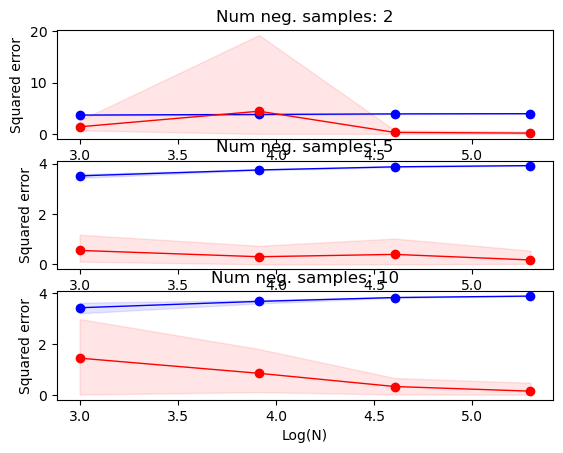

In [39]:
# Visualise results
fig, ax = plt.subplots(len(num_neg_samples), 1)
colors = ['b', 'r']

log_num_samples = np.log(np.array(num_samples))
for j, axis in enumerate(ax):
    for k, (crit, lab) in enumerate(zip(criteria, crit_labels)):
        plot_res(log_num_samples, error_res[:, j, k, :], lab, colors[k], axis)
        axis.set_title("Num neg. samples: {}".format(num_neg_samples[j]))
        
plt.show()

In [21]:
error_res

array([[[[5.10308333e-02, 4.92342204e-01, 7.77131796e-01,
          2.33187771e+00, 2.62440896e+00],
         [1.15147412e-01, 4.25497019e-05, 6.64694384e-02,
          1.97705495e+00, 2.32757735e+00]],

        [[8.70184302e-02, 2.21635323e+01, 2.56749344e+00,
          1.07421681e-01, 2.52964616e+00],
         [4.37428564e-04, 1.95084419e+01, 2.35373735e+00,
          1.42162554e-02, 2.27729177e+00]],

        [[9.92770121e-02, 4.29833949e-01, 2.66352201e+00,
          3.46902823e+00, 1.79583240e+00],
         [1.23785877e+00, 1.10509709e-01, 2.50096440e+00,
          3.44320369e+00, 2.23449063e+00]]],


       [[[2.12980008e+00, 4.72877169e+00, 4.95829850e-01,
          8.32229257e-01, 3.10524964e+00],
         [1.03621483e+00, 5.36193228e+00, 5.92324734e-01,
          3.63769650e-01, 2.83837318e+00]],

        [[5.06558605e-02, 7.59910464e-01, 1.24160981e+00,
          3.03984952e+00, 4.97199856e-02],
         [6.46162748e+00, 8.08385666e-03, 4.44063336e-01,
          2.80962086e+0